In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add src to path so we can import our modules
sys.path.append(os.path.abspath('..'))

from src.data_processing import DrugResponseLoader, preprocess_data

%matplotlib inline

## 2. Load and Inspect Models
We initialize our loader with the paths to our raw data.

In [2]:
DATA_DIR = '../data/raw'
loader = DrugResponseLoader(
    expr_path=f'{DATA_DIR}/mock_gene_expression.csv', 
    resp_path=f'{DATA_DIR}/mock_drug_response.csv'
)

loader.load_data()

Loading datasets...
Expression Data Loaded: (220, 1000) (Samples x Genes)


## 3. Filter for Target Drug
We will focus on **Bortezomib** for this analysis.

Filtering response data for drug: Bortezomib
Cell lines with valid IC50 for Bortezomib: 203


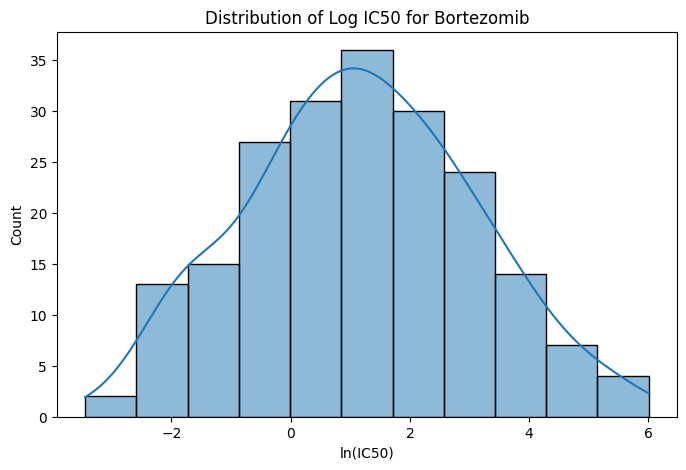

In [3]:
TARGET_DRUG = 'Bortezomib'
loader.filter_drug(TARGET_DRUG)

# Show distribution of IC50
plt.figure(figsize=(8, 5))
sns.histplot(data=loader.raw_resp, x='LN_IC50', kde=True)
plt.title(f'Distribution of Log IC50 for {TARGET_DRUG}')
plt.xlabel('ln(IC50)')
plt.show()

## 4. Align/Match Cell Lines
We only keep cell lines that have BOTH gene expression data and a valid drug response.

In [4]:
X, y = loader.match_cell_lines()

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Matching cell lines... Found 184 common cell lines.
Features (X) shape: (184, 1000)
Target (y) shape: (184,)


## 5. Preprocessing Pipeline
We apply the pipeline: Split -> Filter Low Variance Genes -> Normalize.
**Note:** Scaling is fitted on Train and applied to Test to prevent data leakage.

In [5]:
X_train, X_test, y_train, y_test = preprocess_data(X, y)

# Verify shapes
print(f"Final Train Set: {X_train.shape}")
print(f"Final Test Set: {X_test.shape}")


--- Starting Preprocessing ---
Train shape: (147, 1000), Test shape: (37, 1000)
Variance Filtering: Dropped 10 genes. Remaining: 990
Preprocessing Complete.
Final Train Set: (147, 990)
Final Test Set: (37, 990)


In [6]:
import os

PROCESSED_DIR = '../data/processed'
# Create the processed directory if it doesn't exist
os.makedirs(PROCESSED_DIR, exist_ok=True)


## 6. Save Processed Data
We save the clean datasets for the next phase (Modeling).

In [7]:
PROCESSED_DIR = '../data/processed'
os.makedirs(PROCESSED_DIR, exist_ok=True)

X_train.to_csv(f'{PROCESSED_DIR}/X_train.csv')
X_test.to_csv(f'{PROCESSED_DIR}/X_test.csv')
y_train.to_csv(f'{PROCESSED_DIR}/y_train.csv')
y_test.to_csv(f'{PROCESSED_DIR}/y_test.csv')

print("Processed data saved to data/processed/")

Processed data saved to data/processed/
